In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# import classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

%matplotlib inline

In [2]:
train = pd.read_csv(r'data/train.csv', index_col='id')
test = pd.read_csv(r'data/test.csv', index_col='id')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5271 entries, 7905 to 13175
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5271 non-null   int64  
 1   Drug           5271 non-null   object 
 2   Age            5271 non-null   int64  
 3   Sex            5271 non-null   object 
 4   Ascites        5271 non-null   object 
 5   Hepatomegaly   5271 non-null   object 
 6   Spiders        5271 non-null   object 
 7   Edema          5271 non-null   object 
 8   Bilirubin      5271 non-null   float64
 9   Cholesterol    5271 non-null   float64
 10  Albumin        5271 non-null   float64
 11  Copper         5271 non-null   float64
 12  Alk_Phos       5271 non-null   float64
 13  SGOT           5271 non-null   float64
 14  Tryglicerides  5271 non-null   float64
 15  Platelets      5271 non-null   float64
 16  Prothrombin    5271 non-null   float64
 17  Stage          5271 non-null   float64
dtypes: float6

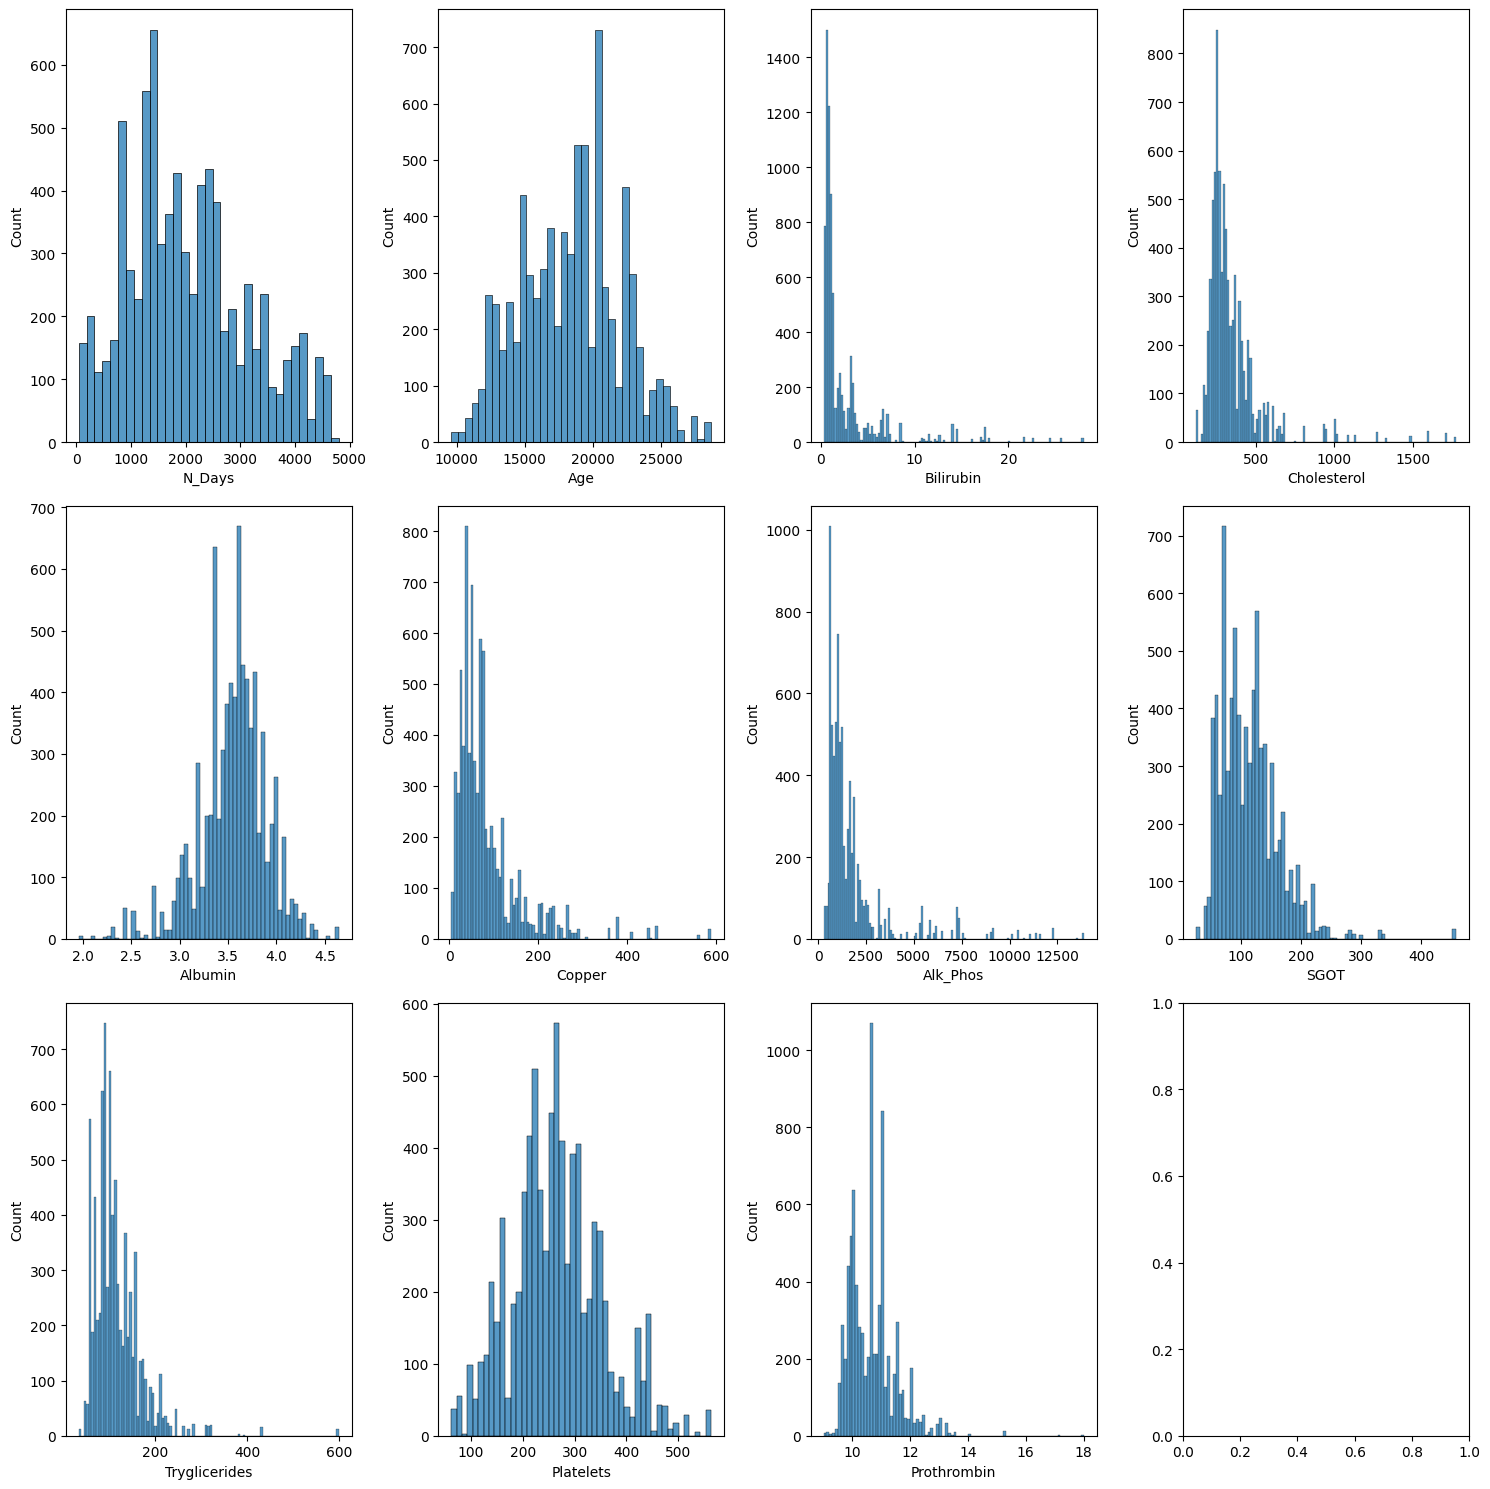

In [5]:
# vis numeric cols' distributions
dtypes = ['float64', 'int64']
float_data = train.select_dtypes(include=dtypes)
float_data = float_data.drop('Stage', axis=1)

fig, ax = plt.subplots(3, 4, figsize=(15,15))
ax = ax.flatten()

for index, col in enumerate(float_data.columns):
    sns.histplot(float_data[col], ax=ax[index])
    #ax[index].set_title(f"{col}")
    
plt.tight_layout()
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

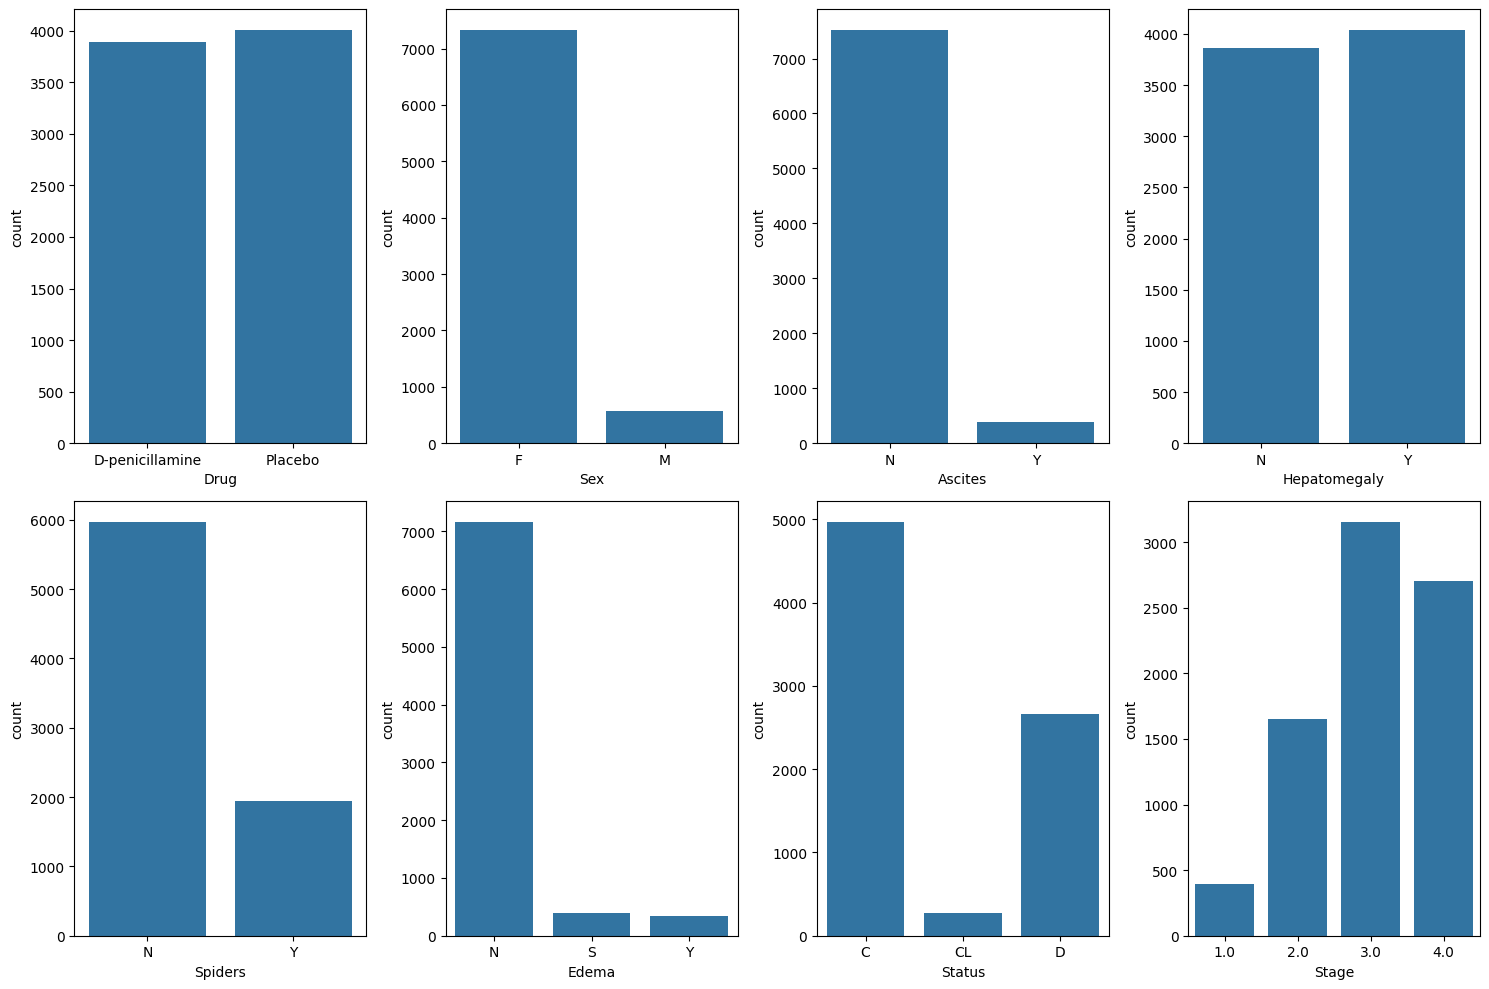

In [7]:
dtypes2 = ['object']
cat_data = train.select_dtypes(include=dtypes2)
cat_data['Stage'] = train['Stage']
cat_data = cat_data.astype('category')

fig, ax = plt.subplots(2, 4, figsize=(15,10))
ax = ax.flatten()

for index, col in enumerate(cat_data):
    sns.countplot(data=cat_data, x=col, ax=ax[index])
    
plt.tight_layout()
plt.show()

<Axes: xlabel='Status', ylabel='count'>

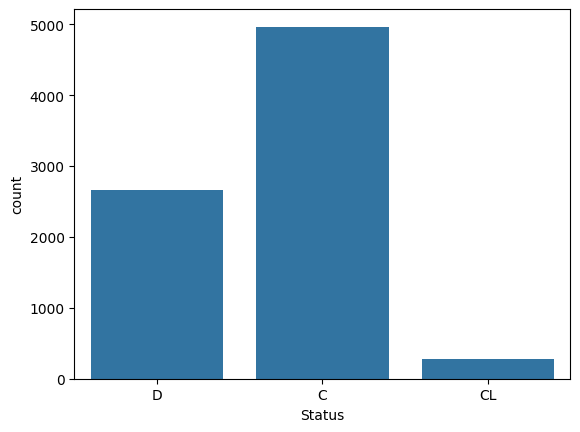

In [8]:
sns.countplot(data=train, x='Status')

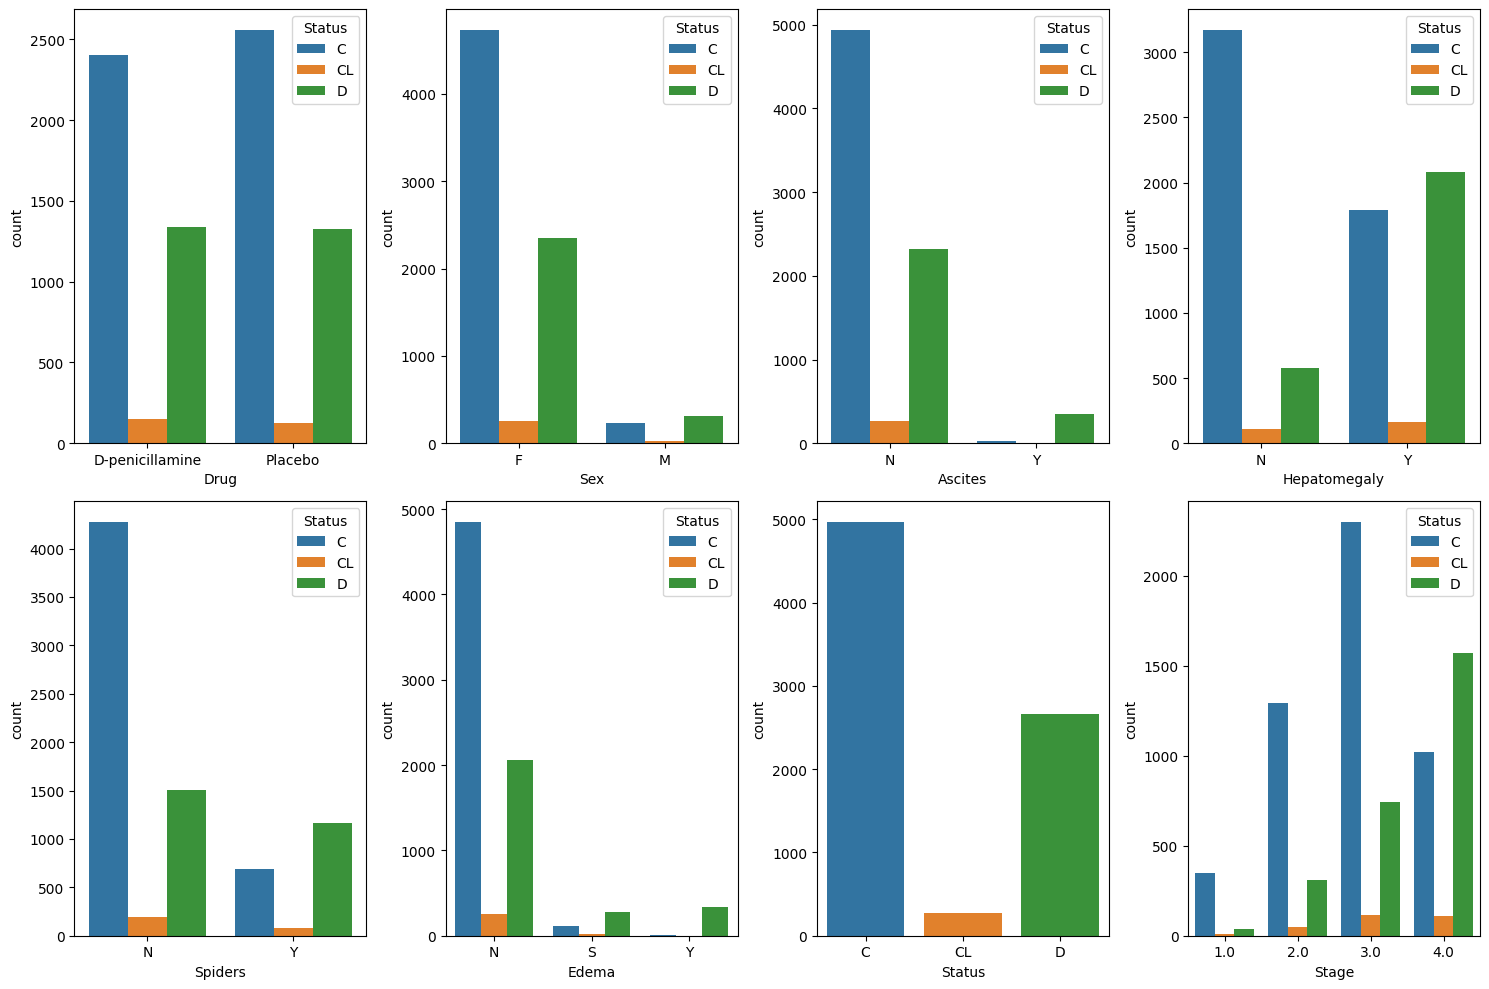

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(15,10))
ax = ax.flatten()
cat_data2 = cat_data.copy()
cat_data2['Status'] = cat_data['Status']

for index, col in enumerate(cat_data2):
    sns.countplot(data=cat_data2, x=col, hue='Status', ax=ax[index])

plt.tight_layout()
plt.show()


In [10]:
binary_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
multi_cat_cols = ['Edema', 'Stage']

In [12]:
binary_data = pd.get_dummies(train[binary_cols], drop_first=True)
multi_cat_data = pd.get_dummies(train[multi_cat_cols])
int_data = train.select_dtypes(include=['int64'])

Text(0.5, 1.0, 'Correlations between numeric variables')

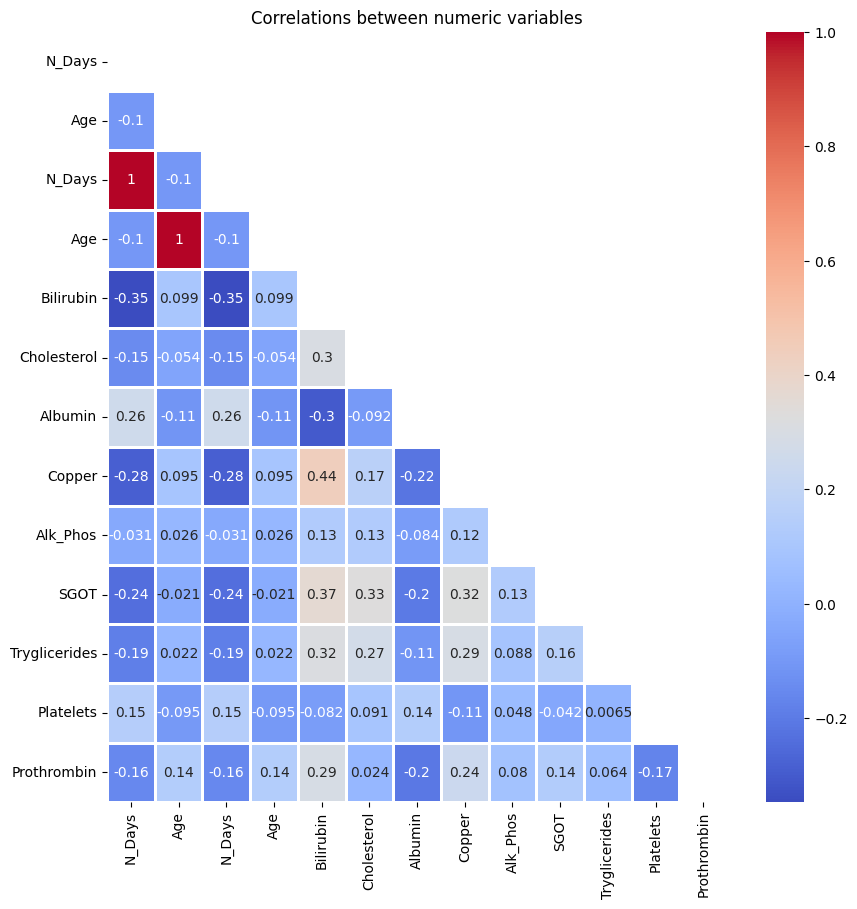

In [21]:
numeric_data = pd.concat([int_data, float_data], axis=1)
corr = numeric_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=2, mask=mask)
plt.title("Correlations between numeric variables")

___

In [15]:
X = pd.concat([binary_data, multi_cat_data, int_data, float_data], axis=1)
y = train['Status']